In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf
import datetime as dt

from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch

In [13]:
NASDAQ = yf.download("^IXIC", interval='1mo', start="1950-01-01", end="2025-12-31",auto_adjust=False,multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [14]:
NASDAQ.shape

(482, 6)

In [16]:
NASDAQ.head(10)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1985-01-01,278.700012,278.700012,278.899994,245.800003,247.100006,1782060000
1985-02-01,284.200012,284.200012,289.299988,277.899994,277.899994,1742850000
1985-03-01,279.200012,279.200012,287.799988,275.600006,285.100006,1611310000
1985-04-01,280.600006,280.600006,284.799988,276.200012,279.500000,1506450000
1985-05-01,290.799988,290.799988,294.799988,278.799988,280.500000,1673270000
1985-06-01,296.200012,296.200012,296.200012,286.700012,291.399994,1582580000
1985-07-01,301.299988,301.299988,307.899994,295.500000,295.899994,1769440000
1985-08-01,297.700012,297.700012,304.600006,295.100006,302.600006,1636000000
1985-09-01,280.299988,280.299988,297.700012,279.500000,297.299988,1334990000


In [17]:
NASDAQ.to_csv("NASDAQ_1mo_1985_to_2025.csv", sep=",")

In [21]:
df = pd.read_csv("NASDAQ_1mo_1985_to_2025.csv", sep=";")
df.head(10)

,Date,Adj Close
0,01/01/1985,278.700012
1,01/02/1985,284.200012
2,01/03/1985,279.200012
3,01/04/1985,280.600006
4,01/05/1985,290.799988
5,01/06/1985,296.200012
6,01/07/1985,301.299988
7,01/08/1985,297.700012
8,01/09/1985,280.299988
9,01/10/1985,292.500000


<Axes: xlabel='Date'>

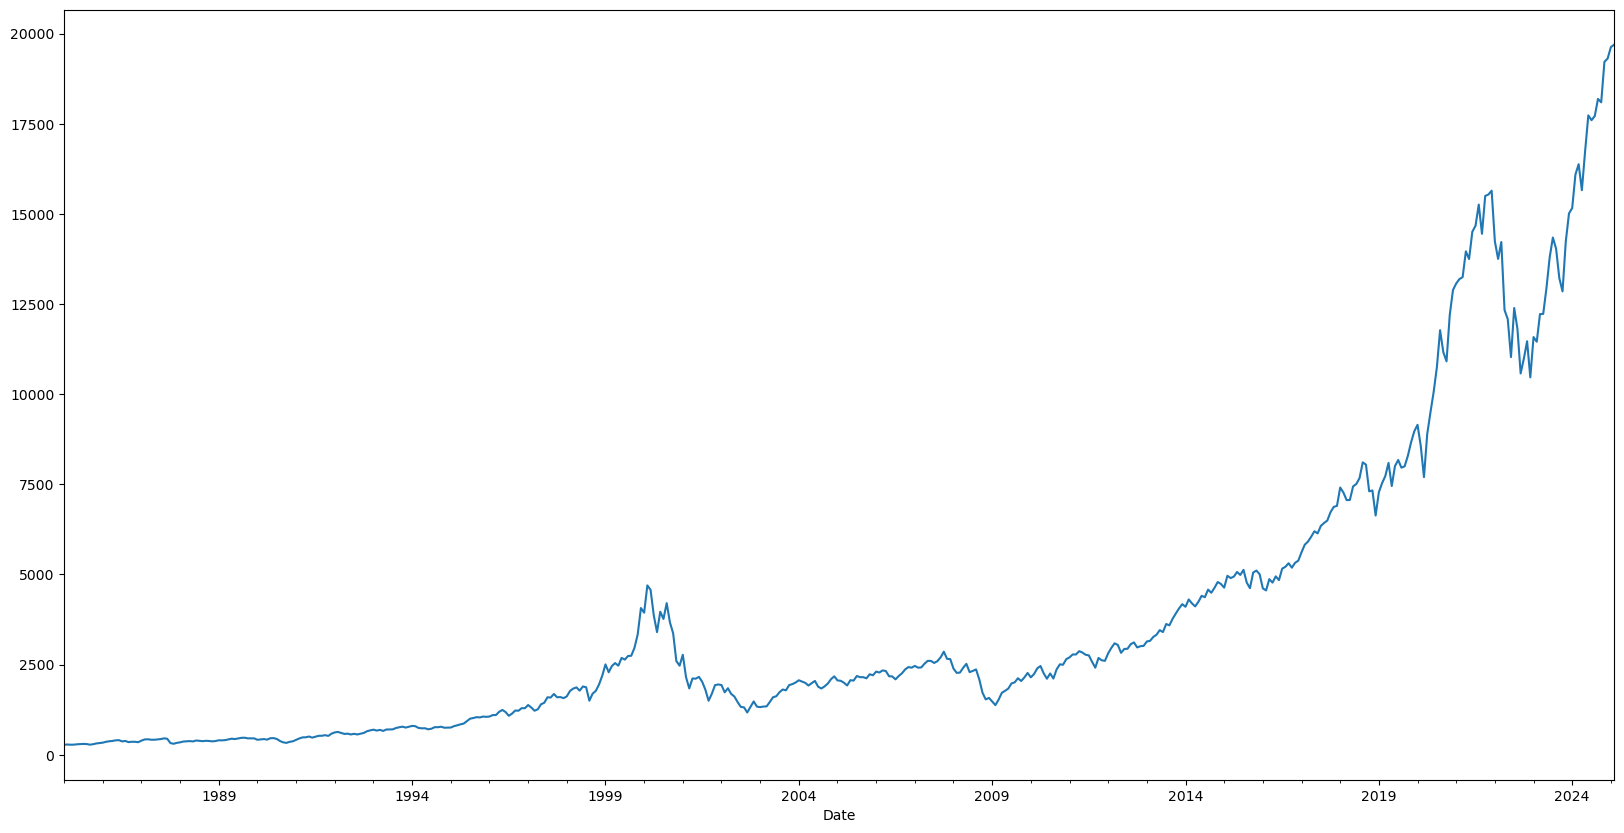

In [22]:
NASDAQ['Adj Close'].plot(figsize=(20,10))